In [1]:
import tensorflow as tf
from tensorflow.python.keras import models
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%config Completer.use_jedi = False

In [2]:
test_image_bgr = cv.imread('test_images/11.png')
test_image = cv.cvtColor(test_image_bgr, cv.COLOR_BGR2RGB)

In [3]:
prepared_image = cv.cvtColor(test_image_bgr, cv.COLOR_BGR2RGB)
prepared_image = cv.fastNlMeansDenoisingColored(prepared_image, None, 10, 10, 7, 21)

In [4]:
input_image_noisy = tf.image.resize(test_image, (256, 256))

In [5]:
input_image_denoised = tf.image.resize(prepared_image, (256, 256))

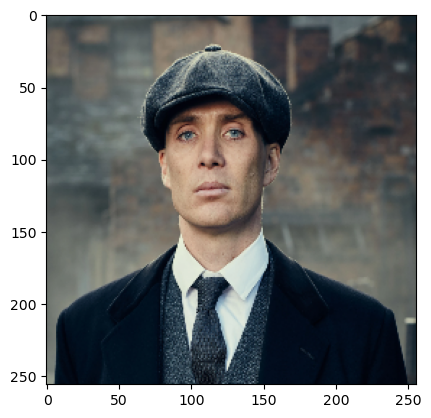

In [6]:
plt.imshow(input_image_noisy.numpy().astype(int))

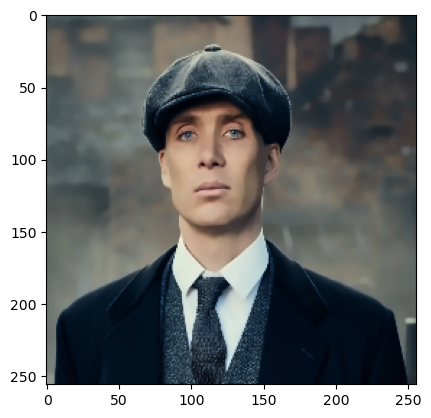

In [7]:
plt.imshow(input_image_denoised.numpy().astype(int))

In [8]:
model = models.load_model('saved_models/maxpooling_leakyrelu/edited_model-2023-2-2-16-11-6.h5')

In [9]:
yhat_noisy = model.predict(np.expand_dims(input_image_noisy / 255, 0))
yhat_denoised = model.predict(np.expand_dims(input_image_denoised / 255, 0))

In [10]:
result_noisy = yhat_noisy.tolist()[0]
result_denoised = yhat_denoised.tolist()[0]

In [11]:
result_noisy

[0.5468647480010986, 0.0016424523200839758, 0.4514928162097931]

In [244]:
result_denoised

[0.7063498497009277, 0.0030112869571894407, 0.29063889384269714]

In [242]:
labels  = ["animal", "car", "human"]
print("Original image: {}. Probability: {}".format(labels[result_noisy.index(max(result_noisy))], max(result_noisy)))
print("Denoised image: {}. Probability: {}".format(labels[result_denoised.index(max(result_denoised))], max(result_denoised)))

Original image: animal. Probability: 0.5468647480010986
Denoised image: animal. Probability: 0.7063498497009277
